<a href="https://colab.research.google.com/github/desaigeet96/DL_Assignments/blob/main/DL_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 100

In [1]:
from keras.datasets import cifar100

(X_train,y_train),(X_test,y_test)=cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

169009152/169001437 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(100)
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [4]:
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 4.5671 - accuracy: 0.0190 - val_loss: 4.4334 - val_accuracy: 0.0332
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 4.2163 - accuracy: 0.0564 - val_loss: 4.0428 - val_accuracy: 0.0840
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.9073 - accuracy: 0.1063 - val_loss: 3.8327 - val_accuracy: 0.1174
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7016 - accuracy: 0.1425 - val_loss: 3.7557 - val_accuracy: 0.1292
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5357 - accuracy: 0.1702 - val_loss: 3.4990 - val_accuracy: 0.1782
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.3907 - accuracy: 0.1955 - val_loss: 3.4558 - val_accuracy: 0.1876
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2502 - accuracy: 0.2195 - val_loss: 3.3211 - val_accuracy:

313/313 - 1s - loss: 2.5363 - accuracy: 0.3750


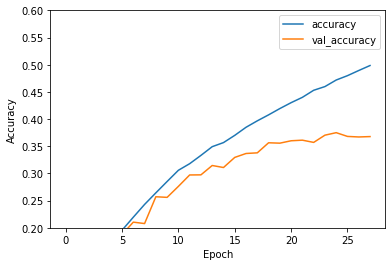

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,0.6])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

# Fashion MNIST

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [8]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [11]:
initializers=tf.keras.initializers.glorot_normal()

model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6479 - accuracy: 0.7829 - val_loss: 0.4979 - val_accuracy: 0.8237
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4467 - accuracy: 0.8431 - val_loss: 0.4909 - val_accuracy: 0.8195
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4012 - accuracy: 0.8587 - val_loss: 0.4397 - val_accuracy: 0.8418
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3725 - accuracy: 0.8683 - val_loss: 0.4061 - val_accuracy: 0.8537
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3518 - accuracy: 0.8752 - val_loss: 0.3799 - val_accuracy: 0.8636
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3341 - accuracy: 0.8797 - val_loss: 0.3693 - val_accuracy: 0.8683
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3198 - accuracy: 0.8842 - val_loss: 0.3531 - val_accuracy:

313/313 - 1s - loss: 0.3255 - accuracy: 0.8842


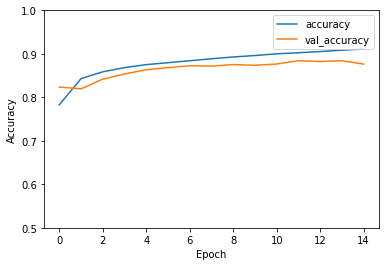

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

# MNIST

In [13]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


initializers=tf.keras.initializers.glorot_normal()
model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5201 - accuracy: 0.8688 - val_loss: 0.2541 - val_accuracy: 0.9274
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2287 - accuracy: 0.9343 - val_loss: 0.1967 - val_accuracy: 0.9412
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1754 - accuracy: 0.9492 - val_loss: 0.1558 - val_accuracy: 0.9549
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1414 - accuracy: 0.9589 - val_loss: 0.1334 - val_accuracy: 0.9614
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1181 - accuracy: 0.9667 - val_loss: 0.1164 - val_accuracy: 0.9643
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1004 - accuracy: 0.9711 - val_loss: 0.1082 - val_accuracy: 0.9666
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - l

313/313 - 1s - loss: 0.0626 - accuracy: 0.9814


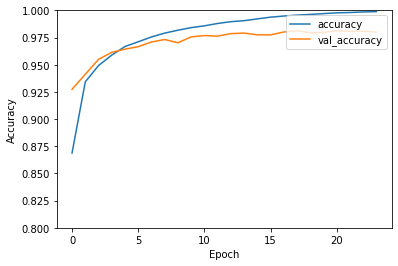

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)